# 1. 生成数据集

In [1]:
import sys

sys.path.append('../../../../')

import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

# 2. 读取数据集

In [2]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个TensorFlow数据迭代器"""
    dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
    if is_train:
        dataset = dataset.shuffle(buffer_size=1000)
    dataset = dataset.batch(batch_size)
    return dataset

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [3]:
next(iter(data_iter))

(<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
 array([[-0.09894875,  0.51157415],
        [ 0.26735914,  0.28523386],
        [ 0.80850714,  0.9742896 ],
        [ 0.4898253 , -0.04659858],
        [-0.6400999 ,  0.37202108],
        [ 1.4996301 ,  1.0857297 ],
        [-1.4931799 , -0.41760463],
        [-1.055916  , -0.19979501],
        [-1.7626767 ,  0.8040868 ],
        [ 0.7881458 ,  0.14606698]], dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 2.2625787],
        [ 3.7636266],
        [ 2.4927692],
        [ 5.3456674],
        [ 1.6530911],
        [ 3.5113282],
        [ 2.6426075],
        [ 2.7679756],
        [-2.0485883],
        [ 5.2601438]], dtype=float32)>)

# 3. 定义模型

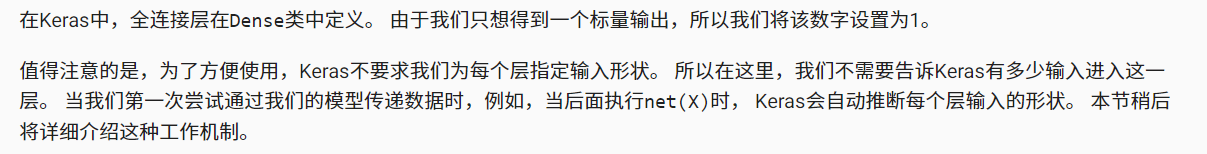

In [4]:
# keras是TensorFlow的高级API
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1))

# 4. 初始化模型参数

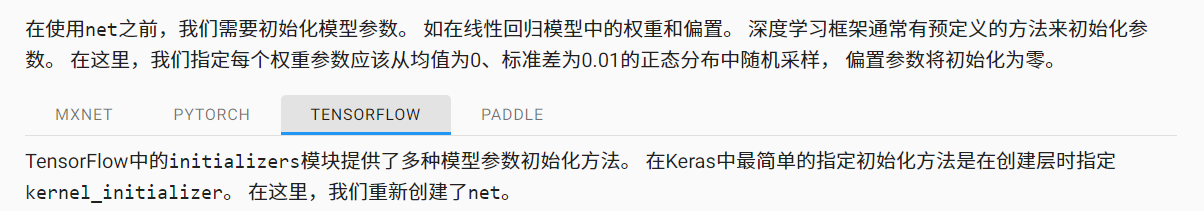

In [5]:
initializer = tf.initializers.RandomNormal(stddev=0.01)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 5. 定义损失函数

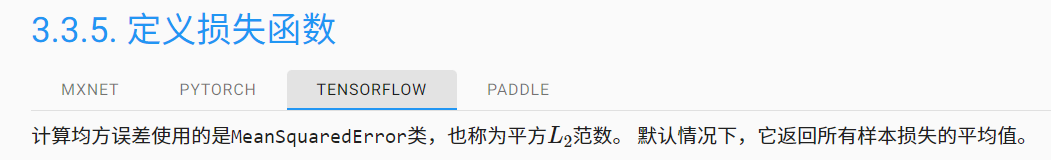

In [6]:
loss = tf.keras.losses.MeanSquaredError()

# 6. 定义优化算法

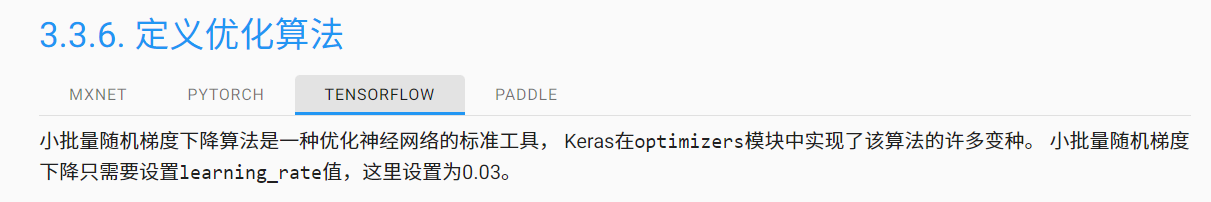

In [7]:
trainer = tf.keras.optimizers.SGD(learning_rate=0.03)

# 7. 训练

In [8]:
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in data_iter:
        with tf.GradientTape() as tape:
            l = loss(net(X, training=True), y)
        grads = tape.gradient(l, net.trainable_variables)
        trainer.apply_gradients(zip(grads, net.trainable_variables))
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000183
epoch 2, loss 0.000102
epoch 3, loss 0.000102
epoch 4, loss 0.000102
epoch 5, loss 0.000102
epoch 6, loss 0.000102
epoch 7, loss 0.000102
epoch 8, loss 0.000102
epoch 9, loss 0.000102
epoch 10, loss 0.000102


In [9]:
w = net.get_weights()[0]
print('w的估计误差：', true_w - tf.reshape(w, true_w.shape))
b = net.get_weights()[1]
print('b的估计误差：', true_b - b)

w的估计误差： tf.Tensor([ 0.00051713 -0.00109649], shape=(2,), dtype=float32)
b的估计误差： [-0.00020742]


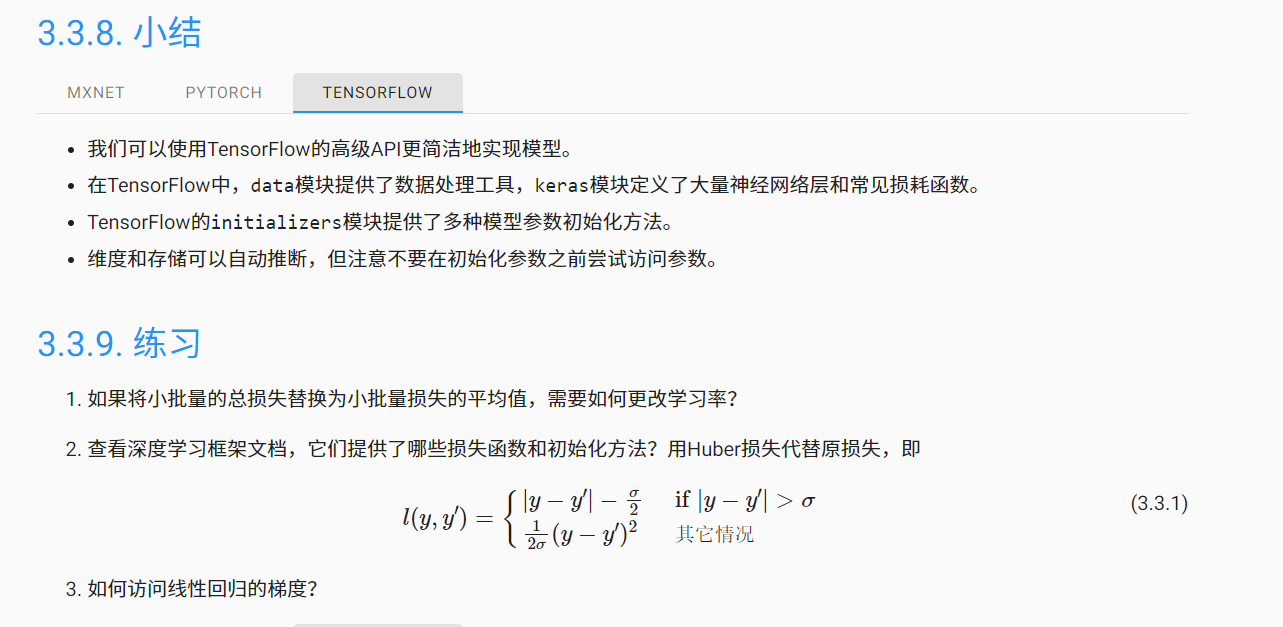